## First pratical of the Unsupervised Language Learning course 2017-2018

Joris Mollinga: 11871431 

Aron Hammond: 10437215

In [ ]:
import numpy as np
import os
import sklearn
import pprint
from collections import deque
from sklearn.cluster import KMeans
from scipy.stats import spearmanr
from scipy.stats import pearsonrfrom sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import random

In [ ]:
def cosine_sim(a,b):
    t = np.dot(a,b)
    n = np.linalg.norm(a) * np.linalg.norm(b)
    return t/n

In [ ]:
# Read the word embeddings file
def readWORDSfile(fileName):
    word2vec = {}
    
    w2i = {}
    i2w = {}

    with open (fileName,'r',encoding="utf8") as emb:
        i = 0
        for line in emb:
            row = line.split()
            word = row[0]
            embedding = row[1:]

            # Convert to floats and assign in dictionary
            word2vec[word] = [float(i) for i in embedding] 
            
            i2w[i] = word
            w2i[word] = i
            i += 1
    return word2vec,i2w,w2i

def read2000words(fileName):
        
    with open (fileName,'r') as nouns:
        words = nouns.readlines()
        
    words = [i.split()[0] for i in words]
            
    return words

def readMEN(fileName):
    judgements = []
    
    with open (fileName,'r') as file:
        for line in file:
            judgements.append(line.split())
    
    return judgements

def readSimLex(fileName):
    judgements = []
    
    with open (fileName,'r') as file:
        for i, line in enumerate(file):
            if i == 0: continue
            judgement = line.split('\t')
            judgements.append([judgement[0], judgement[1], judgement[3]])
            
    return judgements

In [ ]:
word2vec, W2V_i2w, W2V_w2i = readWORDSfile('deps.WORDS')

In [ ]:
bow2, bow2_i2w, bow2_w2i = readWORDSfile('bow2.WORDS')

In [ ]:
bow5, bow5_i2w, bow5_w2i = readWORDSfile('bow5.WORDS')

## Clustering word vectors

In [ ]:
pca2 = PCA(n_components=2)
Xw2v = pca2.fit_transform(list(word2vec.values()))
Xbow2 = pca2.fit_transform(list(bow2.values()))
#Xbow5 = pca2.fit_transform(list(bow5.values()))

Cumulative explained variation for 30 principal components: 0.6502181167172694
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.016s...
[t-SNE] Computed neighbors for 5000 samples in 2.511s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.145701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.633698
[t-SNE] Error after 300 iterations: 2.011321


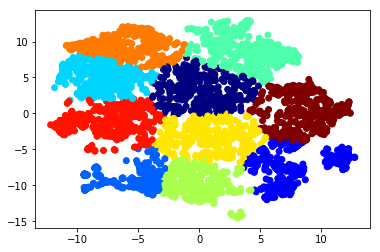

In [25]:
n_sne = 5000 # number of samples
pca30 = PCA(n_components=50)

random_sample = random.sample(list(word2vec.values()),n_sne)

w2v_pca_30 = pca30.fit_transform(random_sample)
print ('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca30.explained_variance_ratio_)))
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
w2v_tsne_pca_results = tsne.fit_transform(w2v_pca_30)

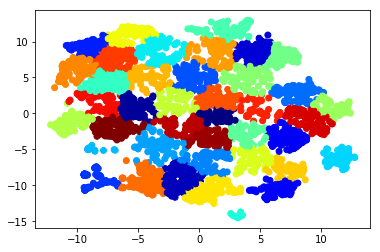

In [28]:
kmeans_tsne = KMeans(n_clusters = 40,random_state = 0).fit(w2v_tsne_pca_results)
predict_tsne = kmeans_tsne.predict(w2v_tsne_pca_results)
centers_tsne = kmeans_tsne.cluster_centers_

plt.scatter(w2v_tsne_pca_results[:,0],w2v_tsne_pca_results[:,1], c=predict_tsne, cmap= 'jet')
plt.show()

for center in centers_tsne:
    print (find_closest_word(center, w2v_tsne_pca_results, W2V_i2w , n = 7))

In [ ]:
words = read2000words('2000_nouns_sorted.txt')
w2v_nouns = []
bow2_nouns = []
bow5_nouns = []
removeList = []

for word in words:
    try:
        w2v_nouns.append(word2vec[word])
        bow2_nouns.append(bow2[word])
        bow5_nouns.append(bow5[word])
    except:
        removeList.append(word)

for word in removeList:
    words.remove(word)

In [ ]:
def find_closest_word(a,p,i2w,n=1):
    if n == 1:
        sim = [cosine_sim(p[i],a) for i in range(0,len(p))]
        idx = sim.index(max(sim))
        return i2w[idx]
    else:
        sim = [cosine_sim(p[i],a) for i in range(0,len(p))]
        idx = sorted(range(len(sim)), key=lambda i: sim[i])[-n:]
        return list(reversed([i2w[i] for i in idx]))

In [169]:
# Pick a random word, and find the n-closest words
word = random.choice(words)
print (word)
print (find_closest_word(Xw2v[W2V_w2i[word]],Xw2v, W2V_i2w,20))
print (find_closest_word(Xbow2[bow2_w2i[word]],Xbow2, bow2_i2w,20))
print (find_closest_word(Xbow2[bow5_w2i[word]],Xbow5, bow5_i2w,20))

interior
['interior', 'disagree', 'street-smart', 'chex', 'hortensia', 'tybalt', 'hopkinton', 'jiyuan', 'bastidas', 'wailer', 'kothamangalam', 'experimentalists', 'casper', 'gotrek', 'abundances', 'anynobody', 'nitrite', 'ibero-american', 'transgressed', 'servicemembers']
['interior', 'inclusively', 'ullmann', 'khatri', 'retailed', 'russias', 'airguns', 'mainmast', '193', 'resnik', 'discontinue', 'winterburn', 'prophesized', 'beacuse', 'suryanarayana', 'plebiscite', 'calgary-based', 'gianna', 'sexes', 'hardesty']
['highways', 'kuch', 'eagle', 'danish-norwegian', 'school-aged', 'exactly', 'benchmarking', 'tetun', 'abysmally', 'louny', '16-game', 'contemplation', 'runaways', 'retest', 'worthen', 'bathing', 'ohh', 'jordy', 'mop', 'lusophone']


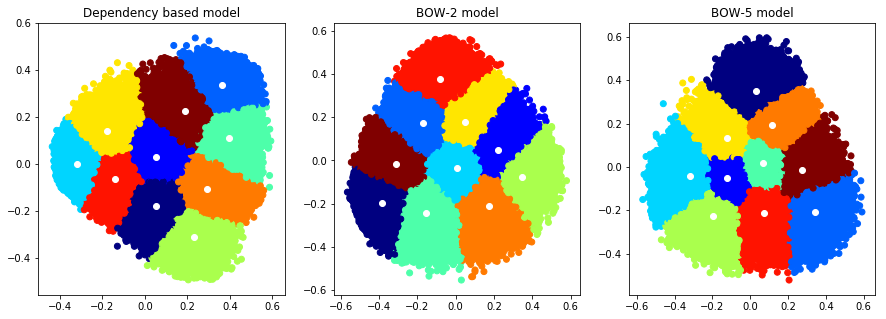

In [149]:
num_clusters = 10
kmeans_w2v = KMeans(n_clusters = num_clusters,random_state = 0).fit(Xw2v)
predict_w2v = kmeans_w2v.predict(Xw2v)
centers_w2v = kmeans_w2v.cluster_centers_

kmeans_bow2 = KMeans(n_clusters = num_clusters,random_state = 0).fit(Xbow2)
predict_bow2 = kmeans_bow2.predict(Xbow2)
centers_bow2 = kmeans_bow2.cluster_centers_

kmeans_bow5 = KMeans(n_clusters = num_clusters,random_state = 0).fit(Xbow5)
predict_bow5 = kmeans_bow5.predict(Xbow5)
centers_bow5 = kmeans_bow5.cluster_centers_

f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.scatter(Xw2v[:,0],Xw2v[:,1], c=predict_w2v,cmap= 'jet')
ax1.scatter(centers_w2v[:,0],centers_w2v[:,1],c='1.0')
ax1.set_title('Dependency based model')

ax2.scatter(Xbow2[:,0],Xbow2[:,1], c=predict_bow2,cmap= 'jet')
ax2.scatter(centers_bow2[:,0],centers_bow2[:,1],c='1.0')
ax2.set_title('BOW-2 model')

ax3.scatter(Xbow5[:,0],Xbow5[:,1], c=predict_bow5,cmap= 'jet')
ax3.scatter(centers_bow5[:,0],centers_bow5[:,1],c='1.0')
ax3.set_title('BOW-5 model')
plt.show()

In [ ]:
kmeans_w2v_nouns = KMeans(n_clusters = 35,random_state = 0).fit(w2v_nouns)
centers_w2v_nouns = kmeans_w2v_nouns.cluster_centers_

for center in centers_w2v_nouns:
    print (find_closest_word(center, w2v_nouns, words , n = 7))

In [ ]:
kmeans_bow2_nouns = KMeans(n_clusters = 35,random_state = 0).fit(bow2_nouns)
centers_bow2_nouns = kmeans_bow2_nouns.cluster_centers_

for center in centers_bow2_nouns:
    print (find_closest_word(center, bow2_nouns, words , n = 7))

In [ ]:
kmeans_bow5_nouns = KMeans(n_clusters = 35,random_state = 0).fit(bow5_nouns)
centers_bow5_nouns = kmeans_bow5_nouns.cluster_centers_

for center in centers_bow5_nouns:
    print (find_closest_word(center, bow5_nouns, words , n = 7))

In [ ]:
men = readMEN(os.path.join('MEN', 'MEN_dataset_natural_form_full'))

In [ ]:
simlex = readSimLex(os.path.join('SimLex-999', 'SimLex-999.txt'))

## Word Similarity

In [ ]:
def similarity(word1, word2, model):
    '''Compute the cosine similarity of the embeddings of word1 and word2 under the supplied model'''
    
    if not word1 in model or not word2 in model:
        return 0
    
    emb1 = model[word1]
    emb2 = model[word2]
    
    unit_emb1 = emb1 / np.linalg.norm(emb1)
    unit_emb2 = emb2 / np.linalg.norm(emb2)
    
    return np.dot(unit_emb1, unit_emb2)

def evaluate_models_on_set(judgements):
    result = []
    used = []
    
    for pair in judgements:
        word1, word2, score = pair
        bow2sim = similarity(word1, word2, bow2)
        bow5sim = similarity(word1, word2, bow5)
        depssim = similarity(word1, word2, word2vec)
        
        row = [bow2sim, bow5sim, depssim]
        
        if not all(row):
            continue
        
        result.append(row)
        used.append(pair)
    
    return np.array(result, dtype=np.float64), used

def pearson(results, scores):
    corr = []
    for i in range(np.size(results, 1)):
        corr.append(pearsonr(results[:,i], scores)[0])
        
    return np.array(corr)

def top5_similar(model, word):
    top5 = deque()
    
    if word in model:
        emb = model[word]
    
    

# Compute cosine similarity between the words using the three models
# words that don't occur in the models are skipped and removed from
# the evaluation set.
MENResults, men = evaluate_models_on_set(men)
SimLexResults, simlex = evaluate_models_on_set(simlex)
    
# Evaluate the model-produced similarities against human judgements in terms of 
# Pearson and Spearman correlation coefficients.

# Collect human judgements (last column of dataset)
MENScores = np.array([judgement[-1] for judgement in men], dtype=np.float64)
SimLexScores = np.array([judgement[-1] for judgement in simlex], dtype=np.float64)

correlations = {"MEN" : {
                   "Spearman" : [],
                   "Pearson" : []},
               "SimLex" : {
                   "Spearman" : [],
                   "Pearson" : []
               }}

correlations["MEN"]["Spearman"] = spearmanr(MENResults, MENScores, axis = 0).correlation[0:3,-1]
correlations["MEN"]["Pearson"] = pearson(MENResults, MENScores)
correlations["SimLex"]["Spearman"] = spearmanr(SimLexResults, SimLexScores, axis = 0).correlation[0:3,-1]
correlations["SimLex"]["Pearson"] = pearson(SimLexResults, SimLexScores)

pprint.pprint(correlations)

# Compare the performance of the three models on this task.

#  Analyze the data qualitatively and report what are the differences in the kind
# of similarity captured by the three models.

Looking at both Pearson and Spearman correlations, the similarity scores for \texttt{bow5} seem to correlate the best with the MEN evaluations but worst with SimLex. This is most likeley due to the fact that SimLex focusses on similarity rather than relatedness and a larger window captures relatively more topical relations. As expected, the dependency based embeddings have the highest correlation on SimLex.
What is curious, is that correlations with MEN are striclty larger than those on SimLex. 

## Word Analogy

## Clustering